In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import os

import tensorflow as tf

from im2txt import configuration
from im2txt import inference_wrapper
from im2txt.inference_utils import caption_generator
from im2txt.inference_utils import vocabulary

In [3]:
%matplotlib inline
from matplotlib.pyplot import imshow, imread
from matplotlib import pyplot as plt

In [4]:
checkpoint_path = 'im2txt/model.ckpt-2000000'
vocab_file = 'im2txt/word_counts.txt'
input_files = '/media/coco/val2014/COCO_val2014_0000002244*.jpg'

In [5]:
filenames = []
for file_pattern in input_files.split(","):
    filenames.extend(tf.gfile.Glob(file_pattern))
tf.logging.info("Running caption generation on %d files matching %s", len(filenames), input_files)

INFO:tensorflow:Running caption generation on 3 files matching /media/coco/val2014/COCO_val2014_0000002244*.jpg


In [6]:
g = tf.Graph()
with g.as_default():
    model = inference_wrapper.InferenceWrapper()
    restore_fn = model.build_graph_from_config(configuration.ModelConfig(), checkpoint_path)
g.finalize()

vocab = vocabulary.Vocabulary(vocab_file)

sess = tf.Session(graph=g)
restore_fn(sess)
generator = caption_generator.CaptionGenerator(model, vocab)

INFO:tensorflow:Building model.
INFO:tensorflow:Initializing vocabulary from file: im2txt/word_counts.txt
INFO:tensorflow:Created vocabulary with 11520 words
INFO:tensorflow:Loading model from checkpoint: im2txt/model.ckpt-2000000
INFO:tensorflow:Successfully loaded checkpoint: model.ckpt-2000000


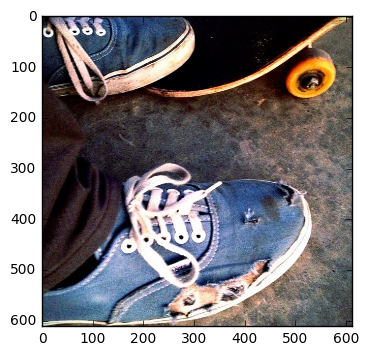

Captions for image COCO_val2014_000000224426.jpg:
  0) a pair of shoes on a skateboard . (p=0.001016)
  1) a pair of shoes and a skateboard on the ground . (p=0.000201)
  2) a pair of shoes on a skateboard in a room . (p=0.000193)


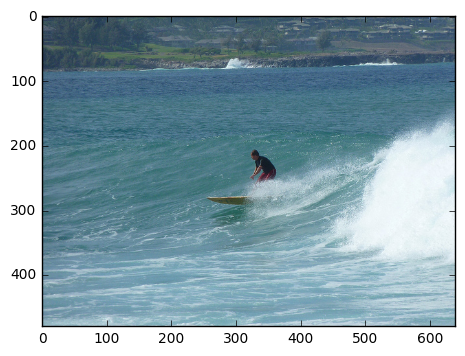

Captions for image COCO_val2014_000000224477.jpg:
  0) a man riding a wave on top of a surfboard . (p=0.036315)
  1) a person riding a surf board on a wave (p=0.016300)
  2) a man on a surfboard riding a wave . (p=0.010876)


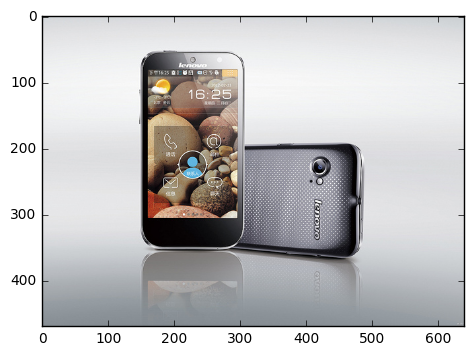

Captions for image COCO_val2014_000000224437.jpg:
  0) a cell phone sitting on top of a table . (p=0.000369)
  1) a cell phone sitting on a table next to a cell phone . (p=0.000074)
  2) a cell phone sitting on a table next to a book . (p=0.000029)


In [7]:
for filename in filenames:
    with tf.gfile.GFile(filename, "r") as f:
        image = f.read()
    captions = generator.beam_search(sess, image)
    plt.figure()
    imshow(imread(filename))
    plt.show()
    print("Captions for image %s:" % os.path.basename(filename))
    for i, caption in enumerate(captions):
        # Ignore begin and end words.
        sentence = [vocab.id_to_word(w) for w in caption.sentence[1:-1]]
        sentence = " ".join(sentence)
        print("  %d) %s (p=%f)" % (i, sentence, math.exp(caption.logprob)))

In [8]:
%timeit captions = generator.beam_search(sess, image)

1 loop, best of 3: 654 ms per loop
